In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import math
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [2]:
prostate_cancer=pd.read_csv("/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data_exploration_ml/Dataset_Prostate_Cancer.csv")

In [3]:
prostate_cancer.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
prostate_cancer.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='diagnosis_result', ylabel='count'>

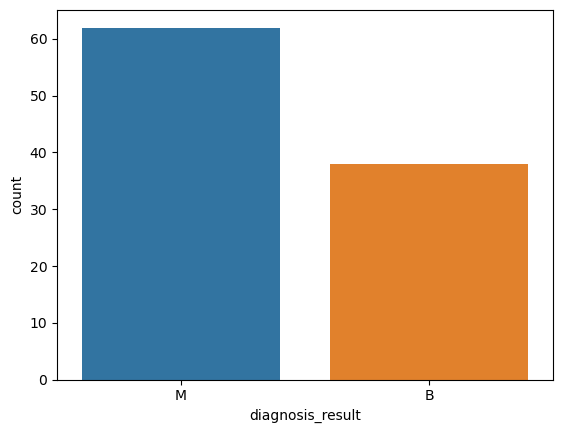

In [5]:
sns.countplot(x='diagnosis_result',data=prostate_cancer)

In [6]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in prostate_cancer.columns: #Iterates through each column in the DataFrame.
    if len(prostate_cancer[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {prostate_cancer[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {prostate_cancer[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

diagnosis_result : ['M' 'B']
diagnosis_result : diagnosis_result
M    62
B    38
Name: count, dtype: int64
radius : [23  9 21 14 25 16 15 19 24 17 12 22 10 20 11 18]
radius : radius
10    11
19     9
16     8
11     8
22     7
21     6
25     6
17     6
20     6
18     6
23     5
14     5
15     5
12     5
9      4
24     3
Name: count, dtype: int64
texture : [12 13 27 16 19 25 26 18 24 11 21 15 22 14 23 20 17]
texture : texture
21    9
15    9
14    8
13    8
11    8
12    7
27    7
26    7
18    7
16    6
24    5
25    4
22    4
19    4
17    4
23    2
20    1
Name: count, dtype: int64


In [7]:
categorical_col

['diagnosis_result', 'radius', 'texture']

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

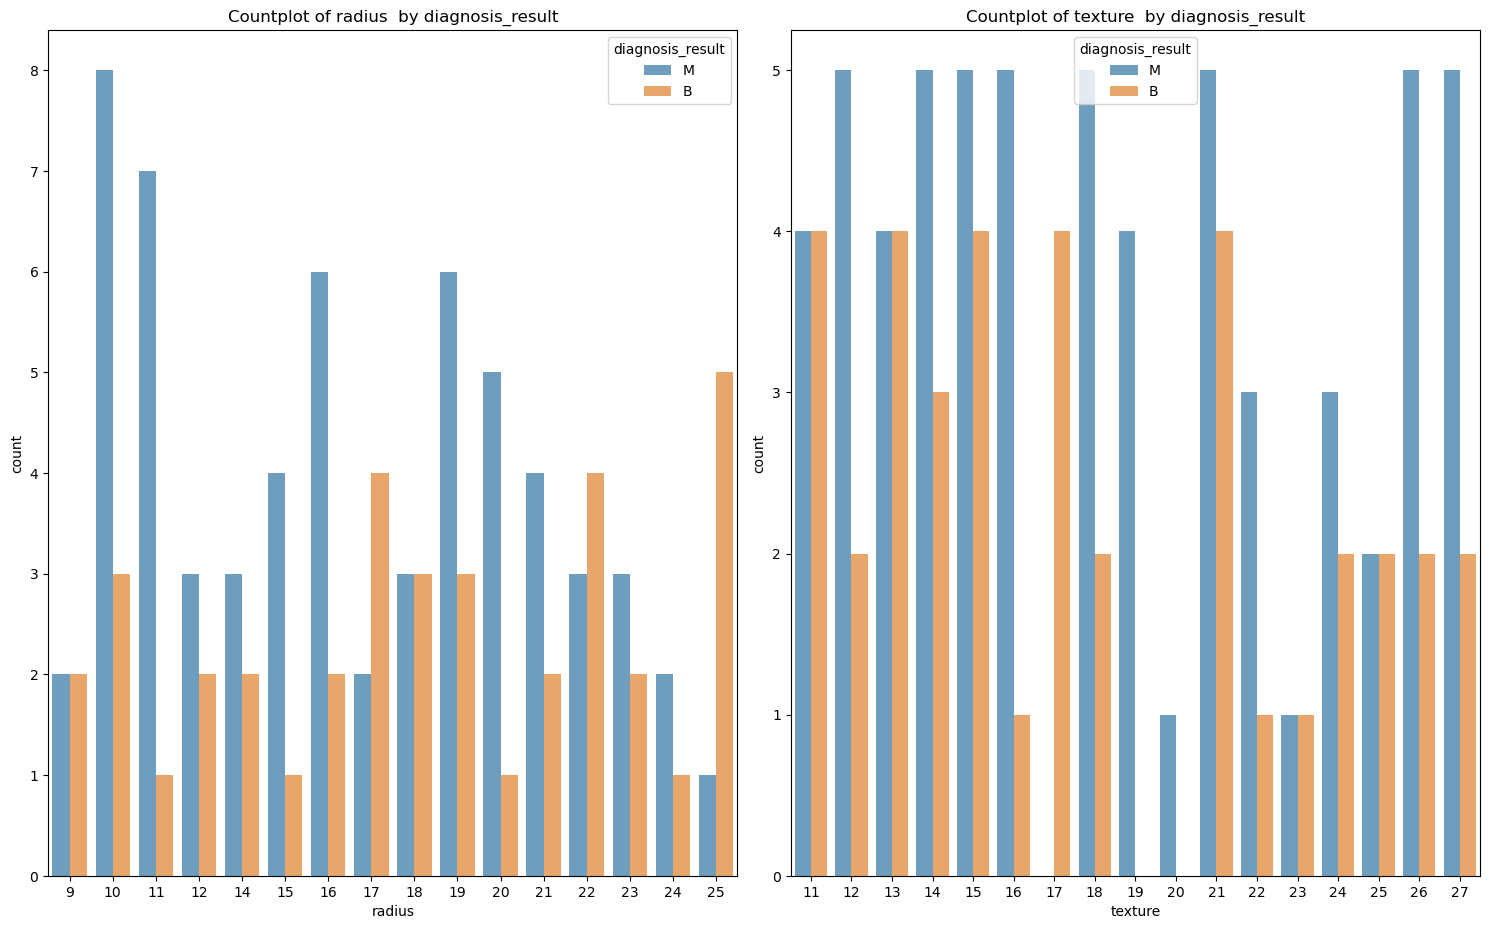

In [8]:
plt.figure(figsize=[15,18])
features = ['radius','texture']
n=1
for f in features:
    plt.subplot(2,2,n)
    sns.countplot(x=f, hue='diagnosis_result', alpha=0.7, data=prostate_cancer)
    plt.title("Countplot of {}  by diagnosis_result".format(f))
    n=n+1
plt.tight_layout()
plt.show()

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

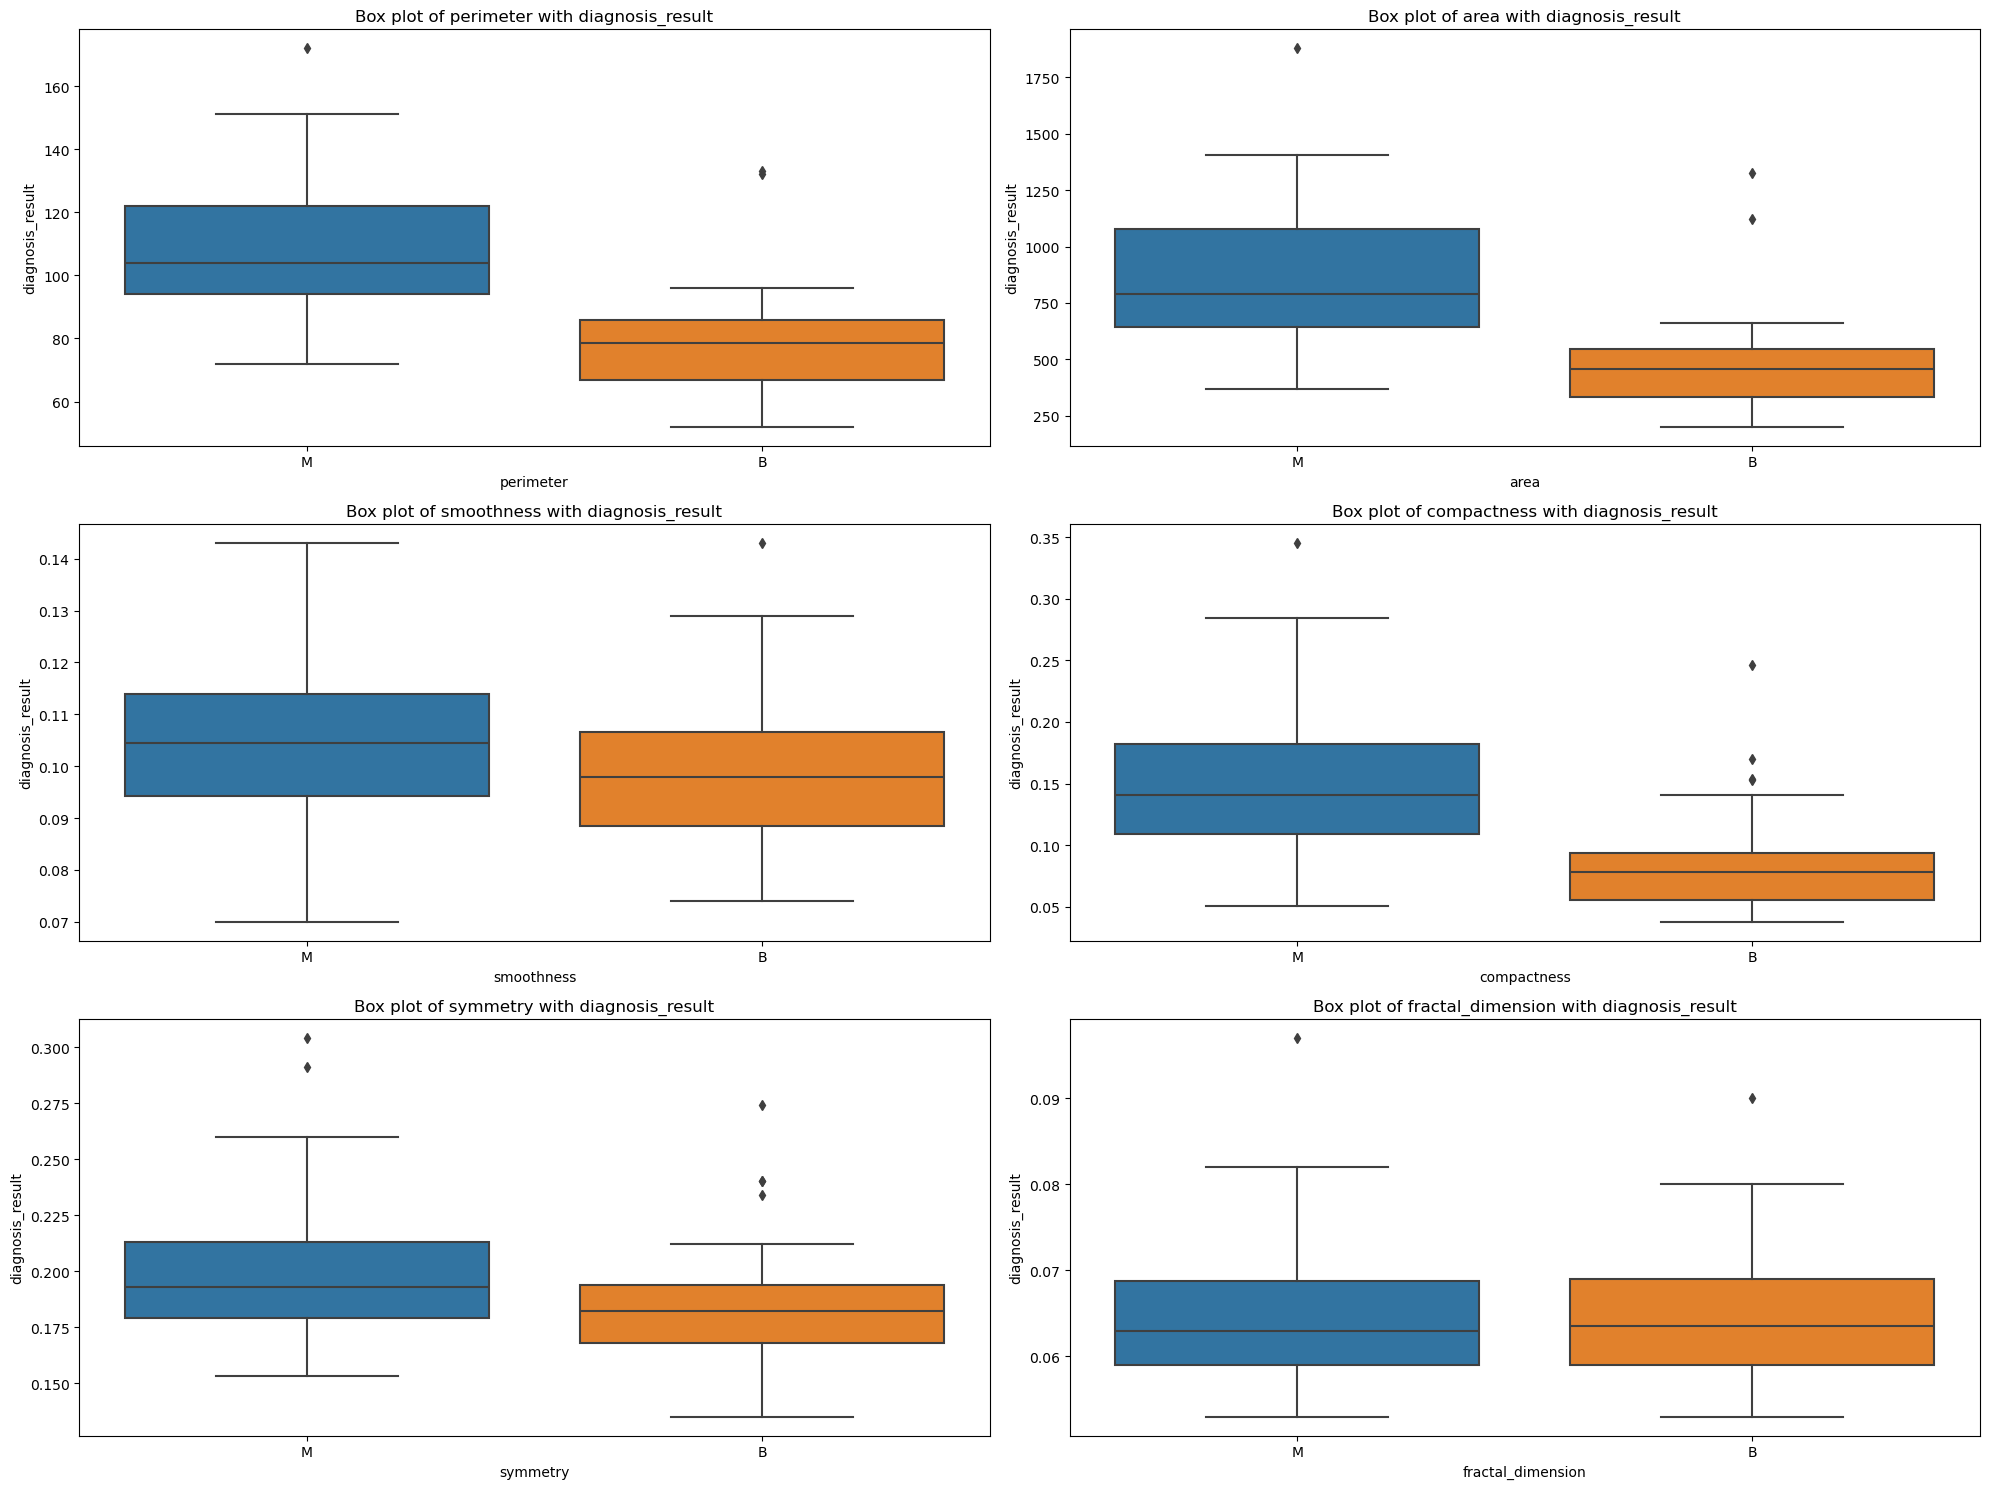

In [10]:
features = ['perimeter', 'area','smoothness','compactness','symmetry','fractal_dimension']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)#5rows, 2 columns
    sns.boxplot(y=feature, x='diagnosis_result', data=prostate_cancer)
    plt.title(f'Box plot of {feature} with diagnosis_result')
    plt.xlabel(feature)
    plt.ylabel('diagnosis_result')

plt.tight_layout()
plt.show()

In [11]:
prostate_cancer.groupby('diagnosis_result').median(numeric_only=True)

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,,,,,,,,,
B,65.5,18.0,17.0,78.5,458.5,0.0980,0.0785,0.182,0.0635
M,38.0,16.0,18.0,104.0,790.5,0.1045,0.1405,0.193,0.0630


In [12]:
prostate_cancer.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [13]:
prostate_cancer.diagnosis_result.value_counts()

diagnosis_result
M    62
B    38
Name: count, dtype: int64

In [14]:
categorical_label_encoder=['diagnosis_result']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_label_encoder:
    prostate_cancer[column] = label_encoder.fit_transform(prostate_cancer[column])

In [15]:
prostate_cancer

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,0,22,14,78,451,0.105,0.071,0.190,0.066
97,98,0,19,27,62,295,0.102,0.053,0.135,0.069
98,99,0,21,24,74,413,0.090,0.075,0.162,0.066


In [76]:
#dividing the data set into x and y.
x_encoded=prostate_cancer.drop('diagnosis_result',axis=1)
y=prostate_cancer['diagnosis_result']

In [17]:
x_encoded

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,14,16,78,386,0.070,0.284,0.260,0.097
4,5,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,96,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,22,14,78,451,0.105,0.071,0.190,0.066
97,98,19,27,62,295,0.102,0.053,0.135,0.069
98,99,21,24,74,413,0.090,0.075,0.162,0.066


In [18]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result, Length: 100, dtype: int64

In [19]:
num_before=dict(Counter(y))
num_before

{1: 62, 0: 38}

In [20]:
smote=SMOTE()#saving the instance

In [21]:
x_smote,y_smote=smote.fit_resample(x_encoded,y)

In [22]:
num_after=dict(Counter(y_smote))
num_after

{1: 62, 0: 62}

In [23]:
after_smote=list(num_after.values())

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dty

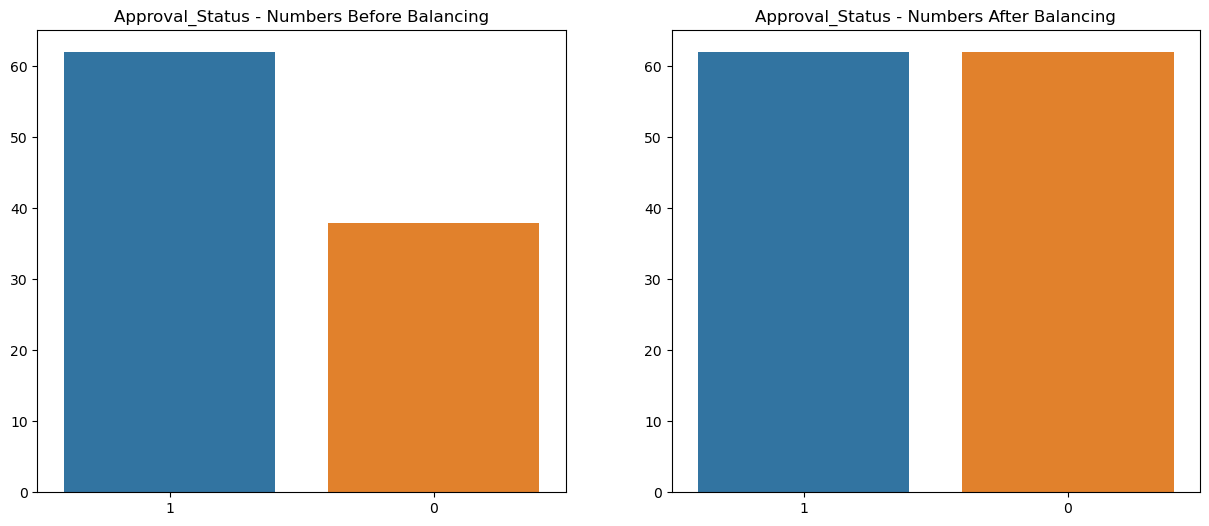

In [24]:
labels = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Approval_Status - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=after_smote)
plt.title("Approval_Status - Numbers After Balancing")
plt.show()

In [27]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [28]:
x_train,x_test,y_train,y_test

(     id  radius  texture  perimeter  area  smoothness  compactness  symmetry  \
 67   68      18       12         72   394    0.081000     0.047000  0.152000   
 12   13      14       15        132  1123    0.097000     0.246000  0.240000   
 24   25       9       13        110   905    0.112000     0.146000  0.200000   
 45   46      18       11        124  1076    0.110000     0.169000  0.191000   
 107  52      24       15         75   437    0.083269     0.048179  0.183686   
 ..   ..     ...      ...        ...   ...         ...          ...       ...   
 106  92      10       17         86   551    0.102635     0.089623  0.167176   
 14   15      12       13         94   578    0.113000     0.229000  0.207000   
 92   93      14       14         85   552    0.074000     0.051000  0.139000   
 51   52      19       22         87   572    0.077000     0.061000  0.135000   
 102  13      20       19         84   498    0.117819     0.148111  0.202892   
 
      fractal_dimension  


In [30]:
#Feature Scaling on x data(x_train & x_test)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [32]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.84
Naive bayes : 0.76
CART : 0.68
Random Forest : 0.68
SVM : 0.84
XGBoost : 0.76
GradientBoosting : 0.68


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [33]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score
Logistic Regression : 100.00%
Precision_score
Naive bayes : 86.67%
Precision_score
CART : 80.00%
Precision_score
Random Forest : 80.00%
Precision_score
SVM : 93.33%
Precision_score
XGBoost : 82.35%
Precision_score
GradientBoosting : 80.00%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [34]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

Recall_score
Logistic Regression : 76.47%
Recall_score
Naive bayes : 76.47%
Recall_score
CART : 70.59%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Recall_score
Random Forest : 70.59%
Recall_score
SVM : 82.35%
Recall_score
XGBoost : 82.35%
Recall_score
GradientBoosting : 70.59%


In [35]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

f1_score
Logistic Regression : 86.67%
f1_score
Naive bayes : 81.25%
f1_score
CART : 75.00%
f1_score
Random Forest : 75.00%
f1_score
SVM : 87.50%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


f1_score
XGBoost : 82.35%
f1_score
GradientBoosting : 75.00%


In [36]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[ 8  0]
 [ 4 13]]
----------------------------------
Naive bayes : [[ 6  2]
 [ 4 13]]
----------------------------------
CART : [[ 5  3]
 [ 5 12]]
----------------------------------
Random Forest : [[ 5  3]
 [ 5 12]]
----------------------------------
SVM : [[ 7  1]
 [ 3 14]]
----------------------------------
XGBoost : [[ 5  3]
 [ 3 14]]
----------------------------------
GradientBoosting : [[ 5  3]
 [ 5 12]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [217]:
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [218]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0])

In [219]:
accuracy_lr= accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.8

In [220]:
train_score_lr=lr.score(x_train,y_train)
train_score_lr

0.8383838383838383

In [221]:
#Train score is higher than the test score which depicts an overfitting scenario hence we will be applying hyper-parameter tuning on logistic regression
#applying hyper-parameter tuning for logistic regression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [222]:
pipeline = Pipeline([
   ('scaler', StandardScaler()), ('clf', LogisticRegression())
])

In [223]:
param_grid = {
    'clf__C': [0.1, 1, 10],# lambda regularization parameters used for defining the extent of shrinkage of the coefficients of the model
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf__penalty': ['l2']  # 'l1' is not compatible with 'lbfgs'
}

In [224]:
from sklearn.model_selection import GridSearchCV
grid_search_lr = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [225]:
best_params = grid_search_lr.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}


In [226]:
best_C = best_params['clf__C']
best_solver = best_params['clf__solver']
best_penalty = best_params.get('clf__penalty', 'l2')
# The best accuracy score for Logistic Regression for best parameters is:

grid_search_lr.best_score_

0.85

In [227]:
# Fitting the Logistic Regression with best parameters
lr_best_params = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
lr_best_params.fit(x_train, y_train)
print(f"Train accuracy: {lr_best_params.score(x_train, y_train):.2f}")

Train accuracy: 0.82


In [228]:
print(f"Test accuracy: {lr_best_params.score(x_test, y_test):.2f}")

Test accuracy: 0.84


In [229]:
y_pred_lr_tune = lr_best_params.predict(x_test)
y_pred_lr_tune

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0])

In [236]:
precision_lr_tune = precision_score(y_test, y_pred_lr_tune)*100
precision_lr_tune

100.0

In [232]:
recall_lr_tune = recall_score(y_test, y_pred_lr_tune)*100
recall_lr_tune

76.47058823529412

In [233]:
f1_lr_tune = f1_score(y_test, y_pred_lr_tune)*100
f1_lr_tune

86.66666666666666

In [234]:
confusion_lr_tune = confusion_matrix(y_test, y_pred_lr_tune)
confusion_lr_tune

array([[ 8,  0],
       [ 4, 13]])

In [80]:
#Applying SVM with default parameters
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.84


In [83]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [86]:
y_pred_svc=svc.predict(x_test)
y_pred_svc

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1])

In [87]:
train_score_svc=svc.score(x_train,y_train)
train_score_svc

0.898989898989899

In [207]:
#applying svm kernel=linear
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.84


In [208]:
svc_lr=SVC(kernel='linear')
svc_lr.fit(x_train,y_train)

SVC(kernel='linear')

In [209]:
y_pred_svc_lr=svc_lr.predict(x_test)
y_pred_svc_lr

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1])

In [210]:
train_score_svc_lr=svc_lr.score(x_train,y_train)
train_score_svc_lr

0.8686868686868687

In [211]:
precision = precision_score(y_test, y_pred_svc_lr)*100
precision

93.33333333333333

In [212]:
recall = recall_score(y_test, y_pred_svc_lr)*100
recall

82.35294117647058

In [213]:
f1 = f1_score(y_test, y_pred_svc_lr)*100
f1

87.49999999999999

In [214]:
confusion = confusion_matrix(y_test, y_pred_svc_lr)
confusion

array([[ 7,  1],
       [ 3, 14]])

In [88]:
#applying svm kernel=rbf
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.84


In [97]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)

SVC()

In [98]:
y_pred_svc_rbf=svc_rbf.predict(x_test)
y_pred_svc_rbf

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1])

In [99]:
train_score_svc_rbf=svc_rbf.score(x_train,y_train)
train_score_svc_rbf

0.898989898989899

In [89]:
#applying svm kernel=poly
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.88


In [204]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [205]:
y_pred_svc_poly=svc_poly.predict(x_test)
y_pred_svc_poly

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1])

In [206]:
train_score_svc_poly=svc_poly.score(x_train,y_train)
train_score_svc_poly

0.9393939393939394

In [90]:
#applying svm kernel=sigmoid
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.52


In [100]:
svc_sig=SVC(kernel='sigmoid')
svc_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [101]:
y_pred_svc_sig=svc_sig.predict(x_test)
y_pred_svc_sig

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0])

In [102]:
train_score_svc_sig=svc_sig.score(x_train,y_train)
train_score_svc_sig

0.6565656565656566

In [104]:
#Applying different kernals with cross validation
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.76  0.88  0.68  0.88  0.875]
0.8150000000000001


In [105]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.72  0.96  0.72  0.88  0.875]
0.8309999999999998


In [106]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.72       0.8        0.72       0.72       0.79166667]
0.7503333333333333


In [107]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='sigmoid')
scores = cross_val_score(svc, x_smote, y_smote, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.4  0.48 0.36 0.4  0.25]
0.378


In [129]:
C_range=list(np.arange(5,50,2.5))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.782258064516129, 0.8064516129032258, 0.8306451612903225, 0.8306451612903225, 0.846774193548387, 0.8225806451612903, 0.8225806451612903, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.814516129032258, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.8548387096774193, 0.8548387096774193, 0.846774193548387, 0.8548387096774193]


In [130]:
np.mean(acc_score)

0.8333333333333334

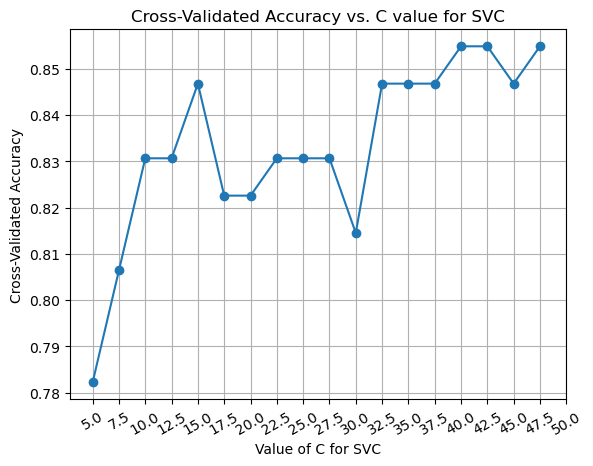

In [132]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(5, 51, 2.5))
plt.xticks(rotation=30)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=linear C=(40.0 to 47.5) gives the maximized accuracy scores around 85% to 87%

In [108]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8217948717948719, 0.8217948717948719, 0.8461538461538461, 0.8461538461538461, 0.8544871794871796, 0.8621794871794872, 0.8698717948717949, 0.8615384615384617, 0.8538461538461538, 0.8384615384615385, 0.8538461538461538, 0.8621794871794872, 0.8615384615384617, 0.8621794871794872, 0.8705128205128204, 0.8705128205128204, 0.8621794871794872, 0.8705128205128204, 0.8621794871794872, 0.8621794871794872, 0.8461538461538461, 0.8698717948717949, 0.8698717948717949, 0.8698717948717949, 0.8621794871794872]


In [109]:
np.mean(acc_score)

0.8572820512820514

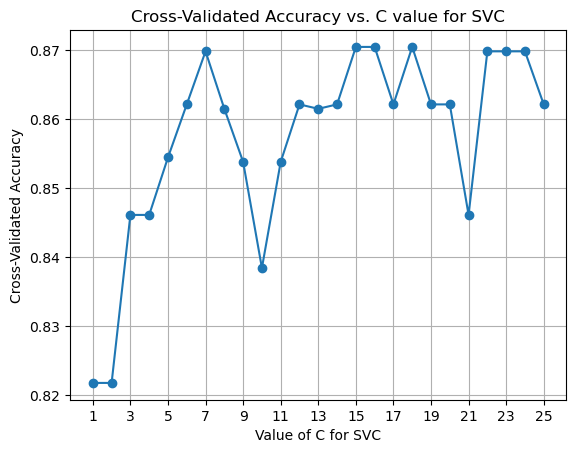

In [110]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(1, 27, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=linear C=(5 to 7),C=(15 to 18),C=(21 to 24) gives the maximized accuracy scores around 87% 

In [133]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.7903225806451613, 0.814516129032258, 0.7983870967741935, 0.7983870967741935, 0.8064516129032258, 0.7983870967741935, 0.8225806451612903, 0.8225806451612903, 0.8225806451612903, 0.8225806451612903, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8225806451612903, 0.8387096774193548, 0.8387096774193548, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8306451612903225,

In [134]:
np.mean(acc_score)

0.8337889557135045

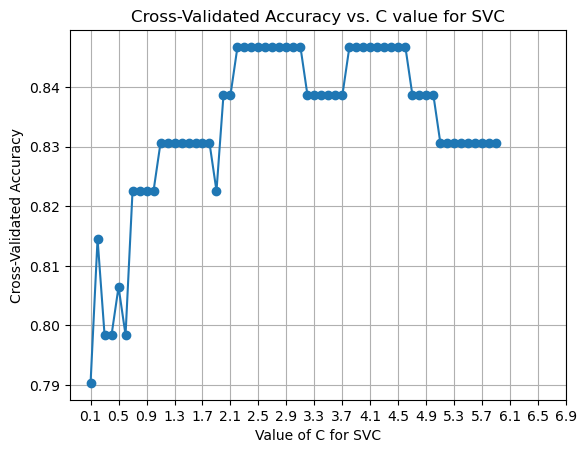

In [141]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.1, 7, 0.4))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=rbf C=(2.2 to 3.1),C=(3.8 to 4.6) gives the maximized accuracy scores around 84% to 87% 

In [147]:
C_range=list(np.arange(0.2,10,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x_smote, y_smote, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.814516129032258, 0.7983870967741935, 0.7983870967741935, 0.8064516129032258, 0.7983870967741935, 0.8225806451612903, 0.8225806451612903, 0.8225806451612903, 0.8225806451612903, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8306451612903225, 0.8225806451612903, 0.8387096774193548, 0.8387096774193548, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.846774193548387, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8387096774193548, 0.8306451612903225, 0.8306451612903225,

In [148]:
np.mean(acc_score)

0.8341836734693876

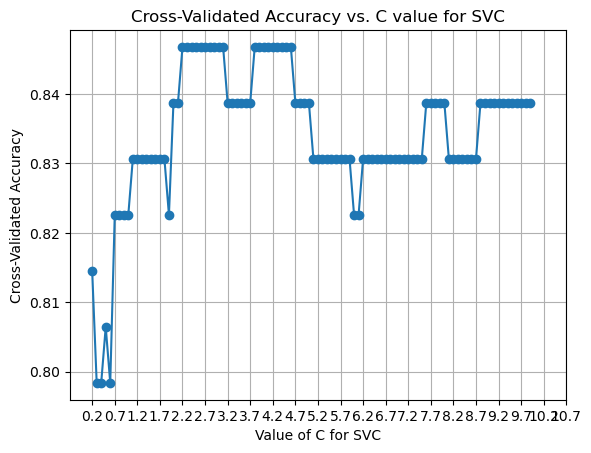

In [149]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.2, 11, 0.5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=rbf C=(2.2 to 3.1),C=(3.8 to 4.6) gives the maximized accuracy scores around 84% to 87% 

In [114]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, x_smote, y_smote, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.7653846153846154, 0.75, 0.7025641025641025, 0.7275641025641025, 0.7275641025641025]


In [115]:
np.mean(acc_score)

0.7346153846153847

Text(0, 0.5, 'Cross-Validated Accuracy')

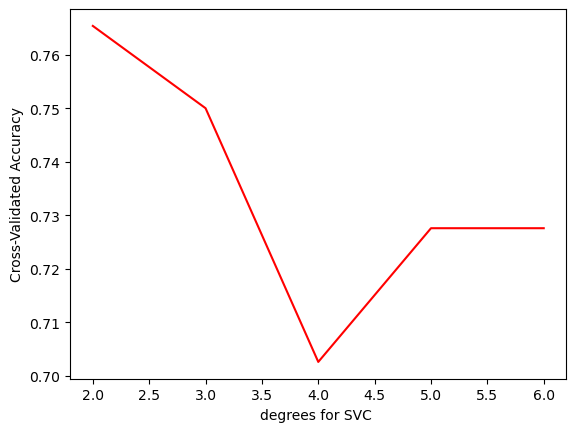

In [116]:
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

For kernal=poly C=(2.0 to 2.5) gives the maximized accuracy scores around 76% to 79% 

In [159]:
#Let us perform Grid search technique to find the best parameter
from sklearn.svm import SVC
svm_model= SVC()

In [160]:
tuned_parameters = {
 'C': (np.arange(5,7,0.5)) , 'kernel': ['linear'], 'C': (np.arange(15,18,0.5)) , 'kernel': ['linear'], 'C': (np.arange(21,24,0.5)) , 'kernel': ['linear'],'C': (np.arange(40,48,0.5)) , 'kernel': ['linear'],
 'C': (np.arange(2,5,0.5)) , 'kernel': ['rbf']
                   }

In [161]:
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=5,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)
y_pred= model_svm.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

0.8578947368421053
{'C': 2.0, 'kernel': 'rbf'}
0.8


In [162]:
#fitting the svm model with the best parameters 
#{'C': 2.0,'kernel': 'rbf'}
svc_best=SVC(kernel='rbf',C=2.0)
svc_best.fit(x_train,y_train)

SVC(C=2.0)

In [163]:
y_pred_svc_tune=svc_best.predict(x_test)
y_pred_svc_tune

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1])

In [164]:
accuracy_svc_tune= accuracy_score(y_test, y_pred_svc_tune)
accuracy_svc_tune

0.8

In [165]:
train_score_svc_tune=svc_best.score(x_train,y_train)
train_score_svc_tune

0.9393939393939394

In [166]:
test_score_svc_tune=svc_best.score(x_test,y_test)
test_score_svc_tune

0.8

In [189]:
# Ridge Regression
rr1 = Ridge(alpha=0.001)
# higher the alpha value, more restriction on the coefficients; 
#low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr1.fit(x_train, y_train)

Ridge(alpha=0.001)

In [190]:
y_pred_rr1=rr1.predict(x_test)
y_pred_rr1

array([ 0.74833238,  1.21995877,  0.50989486,  0.2552778 ,  0.88924431,
        0.54321203,  0.75962325,  0.50568916, -0.04098254,  0.87178711,
        0.84177083,  0.19201325,  0.47175733,  0.76064592,  0.38246576,
        1.12493281,  0.55325521,  0.26225997,  0.74472366,  0.03772062,
        0.329949  ,  1.55447635,  1.49851132,  0.98026442,  0.3968954 ])

In [191]:
train_score_rr1=rr1.score(x_train,y_train)
train_score_rr1

0.524838470170466

In [192]:
test_score_rr1=rr1.score(x_test,y_test)
test_score_rr1

0.38967276703336107

In [193]:
rr2 = Ridge(alpha=100) #  comparison with alpha value
rr2.fit(x_train, y_train)

Ridge(alpha=100)

In [194]:
y_pred_rr2=rr2.predict(x_test)
y_pred_rr2

array([0.48845622, 0.51565131, 0.45464072, 0.46302334, 0.50274683,
       0.43256989, 0.49888613, 0.46655088, 0.42395785, 0.53609158,
       0.49200243, 0.42900042, 0.45643669, 0.46877469, 0.45030004,
       0.50655952, 0.45406657, 0.42394689, 0.47918002, 0.41044547,
       0.45256845, 0.55394297, 0.54568161, 0.50279487, 0.46353047])

In [195]:
train_score_rr2=rr2.score(x_train,y_train)
train_score_rr2

0.0890167825889625

In [196]:
test_score_rr2=rr2.score(x_test,y_test)
test_score_rr2

-0.09003099152392569

In [197]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(x_train, y_train)

LogisticRegression()

In [198]:
Ridge_train_score1 = rr1.score(x_train,y_train)
Ridge_test_score1 = rr1.score(x_test, y_test)

Ridge_train_score2 = rr2.score(x_train,y_train)
Ridge_test_score2 = rr2.score(x_test, y_test)

Logistic_train_score = regr.score(x_train,y_train)
Logistic_test_score = regr.score(x_test, y_test)

In [202]:
print ("ridge regression train score low alpha:", Ridge_train_score1)
print ("ridge regression test score low alpha:", Ridge_test_score1)
print ("ridge regression train score high alpha:", Ridge_train_score2)
print ("ridge regression test score high alpha:", Ridge_test_score2)
print ("logistic regression train score :", Logistic_train_score)
print ("logistic regression test score :", Logistic_test_score)

ridge regression train score low alpha: 0.524838470170466
ridge regression test score low alpha: 0.38967276703336107
ridge regression train score high alpha: 0.0890167825889625
ridge regression test score high alpha: -0.09003099152392569
logistic regression train score : 0.8181818181818182
logistic regression test score : 0.84


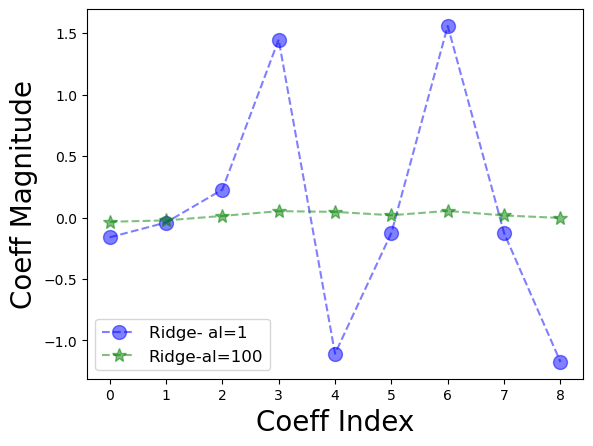

In [237]:
plt.plot(rr1.coef_,alpha = 0.5, linestyle = 'dashed', 
         marker = 'o', markersize = 10, color = 'blue', label = 'Ridge- al=1')
plt.plot(rr2.coef_,alpha = 0.5, linestyle = 'dashed', 
         marker = '*', markersize = 10, color = 'green', label = 'Ridge-al=100')

plt.xlabel('Coeff Index', fontsize = 20)
plt.ylabel('Coeff Magnitude', fontsize = 20)
plt.legend(fontsize = 12)
plt.show()

Logistic regression with hyper-parameter tuning and svm with linear kernal with default parameters gives the best accuracy of 84% without much overfitting there by giving a fair fit.
Now checking the evaluation metrics with these two model instances.

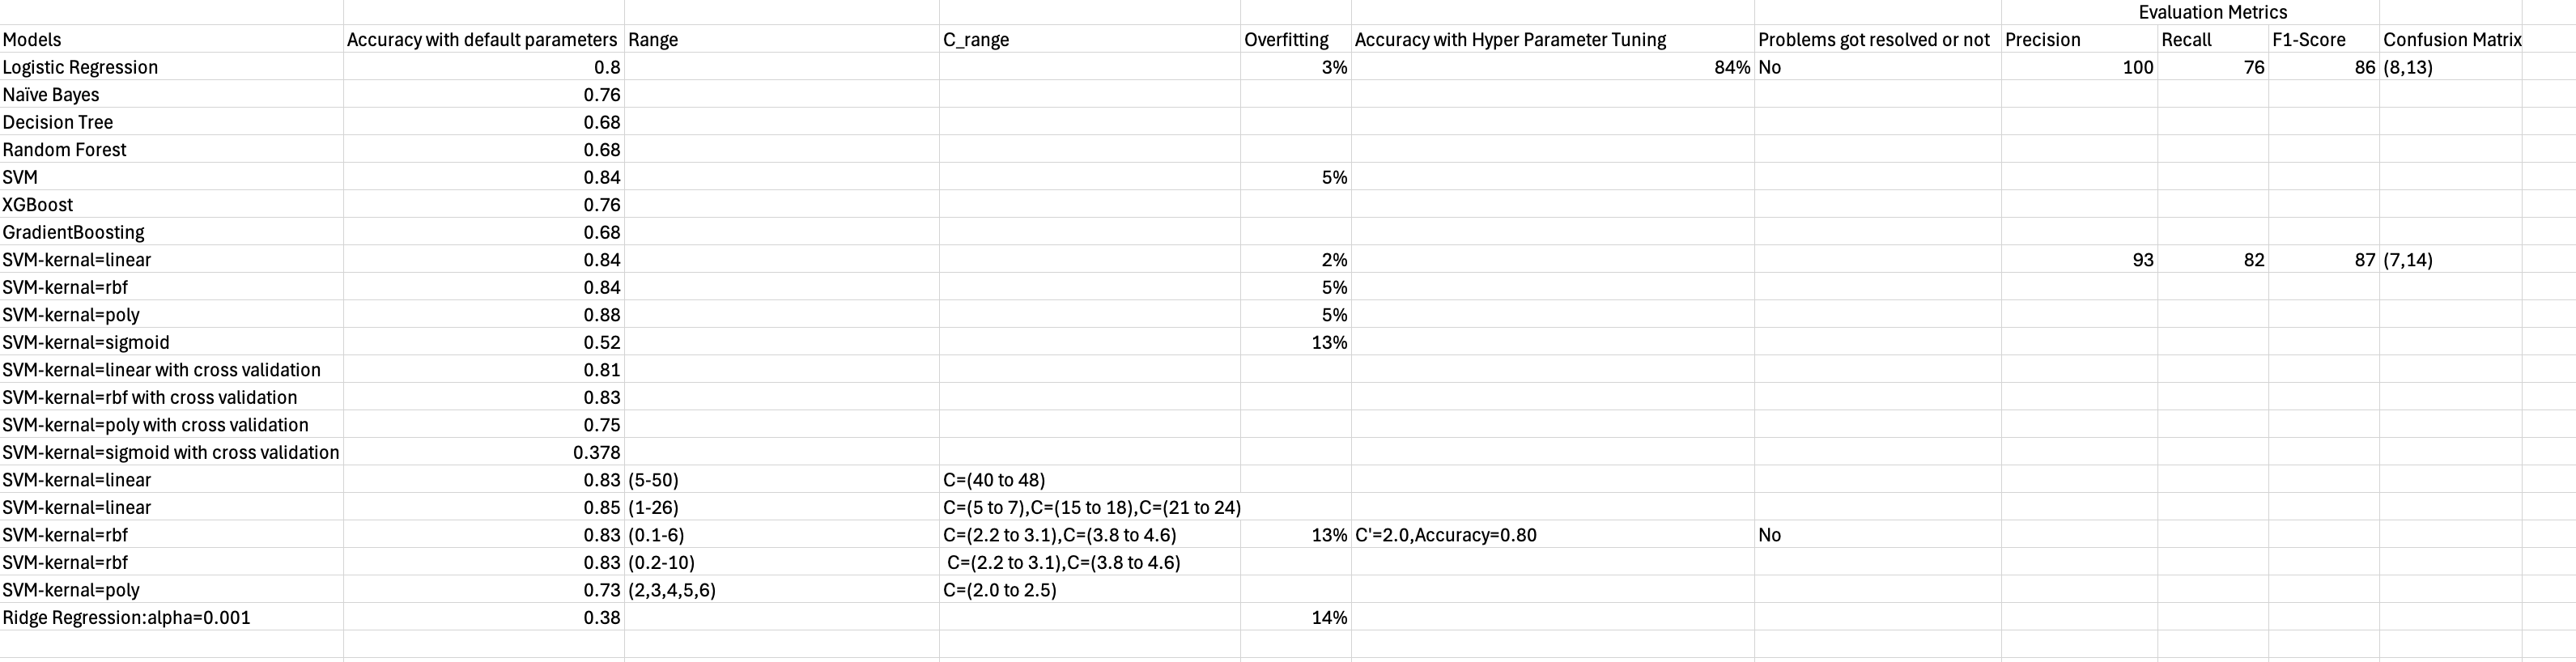